In [31]:
# Import all required libraries 

import pandas as pd
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# Load data & read data using pandas

In [32]:
# Import avacado data files using pandas

df=pd.read_excel("F:/Pranjali/FLIP ROBO_Internship/Assignment_Worksheet/Assignment_Nov_Dec/24th Dec/Customer_Data.xlsx")

In [33]:
# Check dataframe's column wise data 

df.head()

1Gender of respondent  2 How old are you?   \
0                      0                    3   
1                      1                    2   
2                      1                    2   
3                      0                    2   
4                      1                    2   

   3 Which city do you shop online from?  \
0                                      1   
1                                      1   
2                                      2   
3                                      3   
4                                      4   

   4 What is the Pin Code of where you shop online from?  \
0                                             110009       
1                                             110030       
2                                             201308       
3                                             132001       
4                                             530068       

   5 Since How Long You are Shopping Online ?  \
0                                           5   
1                                           5   
2                                           4   
3                                           4   
4                                           3   

   6 How many times you have made an online purchase in the past 1 year?  \
0                                                  4                       
1                                                  5                       
2                                                  5                       
3                                                  1                       
4                                                  2                       

   7 How do you access the internet while shopping on-line?  \
0                                                  4          
1                                                  2          
2                                                  3          
3                                                  3          
4                                                  2          

   8 Which device do you use to access the online shopping?  \
0                                                  3          
1                                                  1          
2                                                  1          
3                                                  1          
4                                                  1          

   9 What is the screen size of your mobile device?  \
0                                                 5   
1                                                 2   
2                                                 4   
3                                                 4   
4                                                 2   

   10 What is the operating system (OS) of your device?  ...  \
0                                                  1     ...   
1                                                  3     ...   
2                                                  2     ...   
3                                                  3     ...   
4                                                  3     ...   

   Longer time to get logged in (promotion, sales period)  \
0                                          Amazon.in        
1                            Amazon.in, Flipkart.com        
2                                         Myntra.com        
3                                       Snapdeal.com        
4                            Flipkart.com, Paytm.com        

   Longer time in displaying graphics and photos (promotion, sales period)  \
0                                          Amazon.in                         
1                                         Myntra.com                         
2                                         Myntra.com                         
3                           Myntra.com, Snapdeal.com                         
4                                          Paytm.com                         

   Late declaration 

In [34]:
# Rename dataframe's columns as below

df.rename(columns={'1Gender of respondent':'Gender',
'2 How old are you? ':'AgeRange',
'3 Which city do you shop online from?':'ShopingCity',
'4 What is the Pin Code of where you shop online from?':'ShopingPIN',
'5 Since How Long You are Shopping Online ?':'OnlineShopingSince',
'6 How many times you have made an online purchase in the past 1 year?':'PastYearPurchace',
'7 How do you access the internet while shopping on-line?':'InternetAccess',
'8 Which device do you use to access the online shopping?':'Device',
'9 What is the screen size of your mobile device?':'MbScreenSize',
'10 What is the operating system (OS) of your device?':'DeviceOS',
'11 What browser do you run on your device to access the website?':'Browser',
'12 Which channel did you follow to arrive at your favorite online store for the first time?':'Channel',
'13 After first visit, how do you reach the online retail store?':'ReachPostFirstVisit',
'14 How much time do you explore the e- retail store before making a purchase decision?':'ExploreTime',
'15 What is your preferred payment Option?':'PaymentOption',
'16 How 4 do you abandon (selecting an items and leaving without making payment) your shopping cart?':'AbandonFreq',
'17 Why did you abandon the “Bag”, “Shopping Cart”?':'AbandonBagShoppingCart',
'18 The content on the website must be easy to read and understand':'Content',
'19 Information on similar product to the one highlighted  is important for product comparison':'SameProdInfo',
'20 Complete information on listed seller and product being offered is important for purchase decision.':'CompleteInfo',
'21 All relevant information on listed products must be stated clearly':'InfoStated',
'22 Ease of navigation in website':'NavigationEase',
'23 Loading and processing speed':'LoadProcSpeed',
'24 User friendly Interface of the website':'Interface',
'25 Convenient Payment methods':'PaymentMethods',
'26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time':'TxnTimeTrust',
'27 Empathy (readiness to assist with queries) towards the customers':'Empathy',
'28 Being able to guarantee the privacy of the customer':'Guarantee',
'29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)':'ComChannels',
'30 Online shopping gives monetary benefit and discounts':'BenefitDiscount',
'31 Enjoyment is derived from shopping online':'Enjoyment',
'32 Shopping online is convenient and flexible':'Conveniency',
'33 Return and replacement policy of the e-tailer is important for purchase decision':'ReturnPolicy',
'34 Gaining access to loyalty programs is a benefit of shopping online':'AccessGain',
'35 Displaying quality Information on the website improves satisfaction of customers':'QualityInfo',
'36 User derive satisfaction while shopping on a good quality website or application':'CustSatisfaction',
'37 Net Benefit derived from shopping online can lead to users satisfaction':'NetBenefit',
'38 User satisfaction cannot exist without trust':'Trust',
'39 Offering a wide variety of listed product in several category':'ProdVariety',
'40 Provision of complete and relevant product information':'ProdInfo',
'41 Monetary savings':'MonSavings',
'42 The Convenience of patronizing the online retailer':'ConvPatro',
'43 Shopping on the website gives you the sense of adventure':'AdvSense',
'44 Shopping on your preferred e-tailer enhances your social status':'SocialStatus',
'45 You feel gratification shopping on your favorite e-tailer':'Gratification',
'46 Shopping on the website helps you fulfill certain roles':'Roles',
'47 Getting value for money spent':'MoneyValue',
'From the following, tick any (or all) of the online retailers you have shopped from':'OnlineRetailers',
'Easy to use website or application':'EaseUse',
'Visual appealing web-page layout':'WPLayout',
'Wild variety of product on offer':'ProdVariety',
'Complete, relevant description information of products':'ProdInfo',
'Fast loading website speed of website and application':'WebSpeed',
'Reliability of the website or application':'WebReliability',
'Quickness to complete purchase':'QuicknessPurch',
'Availability of several payment options':'PaymentOptionsAvl',
'Speedy order delivery':'OrdDelivery',
'Privacy of customers’ information':'CustInfoPrivacy',
'Security of customer financial information':'Security',
'Perceived Trustworthiness':'Trustworthiness',
'Presence of online assistance through multi-channel':'MultiChannel',
'Longer time to get logged in (promotion, sales period)':'LoggedInTime',
'Longer time in displaying graphics and photos (promotion, sales period)':'DisplayTime',
'Late declaration of price (promotion, sales period)':'PriceDeclaration',
'Longer page loading time (promotion, sales period)':'LoadTime',
'Limited mode of payment on most products (promotion, sales period)':'PayMode',
'Longer delivery period':'DeliveryPeriod',
'Change in website/Application design':'WebChange',
'Frequent disruption when moving from one page to another':'DisruptionFreq',
'Website is as efficient as before':'WebEfficiency',
'Which of the Indian online retailer would you recommend to a friend?':'Recommendation'
}, inplace=True)
print(df.columns)

Index(['Gender', 'AgeRange', 'ShopingCity', 'ShopingPIN', 'OnlineShopingSince',
       'PastYearPurchace', 'InternetAccess', 'Device', 'MbScreenSize',
       'DeviceOS', 'Browser', 'Channel', 'ReachPostFirstVisit', 'ExploreTime',
       'PaymentOption', 'AbandonFreq', 'AbandonBagShoppingCart', 'Content',
       'SameProdInfo', 'CompleteInfo', 'InfoStated', 'NavigationEase',
       'LoadProcSpeed', 'Interface', 'PaymentMethods', 'TxnTimeTrust',
       'Empathy', 'Guarantee', 'ComChannels', 'BenefitDiscount', 'Enjoyment',
       'Conveniency', 'ReturnPolicy', 'AccessGain', 'QualityInfo',
       'CustSatisfaction', 'NetBenefit', 'Trust', 'ProdVariety', 'ProdInfo',
       'MonSavings', 'ConvPatro', 'AdvSense', 'SocialStatus', 'Gratification',
       'Roles', 'MoneyValue', 'OnlineRetailers', 'EaseUse', 'WPLayout',
       'ProdVariety', 'ProdInfo', 'WebSpeed', 'WebReliability',
       'QuicknessPurch', 'PaymentOptionsAvl', 'OrdDelivery', 'CustInfoPrivacy',
       'Security', 'Trustworthiness

In [35]:
df.head(1)

Gender  AgeRange  ShopingCity  ShopingPIN  OnlineShopingSince  \
0       0         3            1      110009                   5   

   PastYearPurchace  InternetAccess  Device  MbScreenSize  DeviceOS  ...  \
0                 4               4       3             5         1  ...   

   LoggedInTime  DisplayTime  PriceDeclaration      LoadTime    PayMode  \
0     Amazon.in    Amazon.in      Flipkart.com  Flipkart.com  Amazon.in   

   DeliveryPeriod     WebChange  DisruptionFreq  WebEfficiency  Recommendation  
0       Paytm.com  Flipkart.com       Amazon.in      Amazon.in    Flipkart.com  

[1 rows x 71 columns]

In [36]:
# Checking for null values & data types of all columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  269 non-null    int64 
 1   AgeRange                269 non-null    int64 
 2   ShopingCity             269 non-null    int64 
 3   ShopingPIN              269 non-null    int64 
 4   OnlineShopingSince      269 non-null    int64 
 5   PastYearPurchace        269 non-null    int64 
 6   InternetAccess          269 non-null    int64 
 7   Device                  269 non-null    int64 
 8   MbScreenSize            269 non-null    int64 
 9   DeviceOS                269 non-null    int64 
 10  Browser                 269 non-null    int64 
 11  Channel                 269 non-null    int64 
 12  ReachPostFirstVisit     269 non-null    int64 
 13  ExploreTime             269 non-null    int64 
 14  PaymentOption           269 non-null    int64 
 15  Abando

In [37]:
# Check distribution of categorical feature

df.describe(include=['O'])

OnlineRetailers  \
count                                                 269   
unique                                                  9   
top     Amazon.in, Flipkart.com, Paytm.com, Myntra.com...   
freq                                                   82   

                                                  EaseUse  \
count                                                 269   
unique                                                 10   
top     Amazon.in, Flipkart.com, Paytm.com, Myntra.com...   
freq                                                   64   

                       WPLayout              ProdVariety  \
count                       269                      269   
unique                       10                        9   
top     Amazon.in, Flipkart.com  Amazon.in, Flipkart.com   
freq                         87                      130   

                       ProdInfo   WebSpeed WebReliability QuicknessPurch  \
count                       269        269            269            269   
unique                       11         10             10              9   
top     Amazon.in, Flipkart.com  Amazon.in      Amazon.in     Amazon.com   
freq                        100         51             61             66   

              PaymentOptionsAvl OrdDelivery  ... LoggedInTime  \
count                       269         269  ...          269   
unique                       11           6  ...           10   
top     Amazon.in, Flipkart.com   Amazon.in  ...    Amazon.in   
freq                         65         107  ...           57   

                    DisplayTime PriceDeclaration    LoadTime       PayMode  \
count                       269              269         269           269   
unique                       10                8          11             8   
top     Amazon.in, Flipkart.com       Myntra.com  Myntra.com  Snapdeal.com   
freq                         60               75          61            87   

       DeliveryPeriod  WebChange DisruptionFreq WebEfficiency Recommendation  
count             269        269            269           269            269  
unique              6          7              8             8              8  
top         Paytm.com  Amazon.in      Amazon.in     Amazon.in      Amazon.in  
freq               72         96             53            94             79  

[4 rows x 24 columns]

Max eCommerce store are available in Delhi with highest Online Retailers , Product Variety ,Product Information, website change,website efficiency,payment mode,recommendations, etc.. 

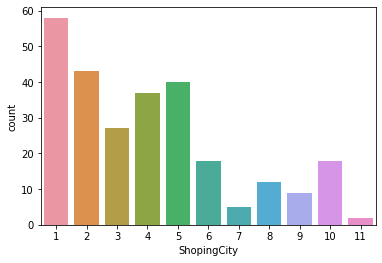

In [38]:
# Analysis of target value 'class' using plot to visualise % of  
sns.countplot(x='ShopingCity', data=df);

Delhi:1 (max)
Greater Noida:2
Karnal :3
Bangalore :4
Noida:5
Solan:6
Moradabad:7
Gurgaon :8
Merrut:9
Ghaziabad:10
Bulandshahr:11 (min)


In [39]:
# class distribution of target 
print(df.groupby('ShopingCity').size())

ShopingCity
1     58
2     43
3     27
4     37
5     40
6     18
7      5
8     12
9      9
10    18
11     2
dtype: int64


It shows higest eCommerce shopping happens in Delhi & lowest in Bulandshahr amongh 11 shopping cities in India.

In [40]:
# class distribution of target 
print(df.groupby('Gender').size())

Gender
0     89
1    180
dtype: int64


It shows Online shopping done by Female % is double than male...,0=Male ; 1=Female

In [41]:
# class distribution of target 
print(df.groupby('AgeRange').size())

AgeRange
1    20
2    79
3    81
4    70
5    19
dtype: int64


Online Shopping % is Maximum in agegroup 31-40 year & lowest in 51 years and above.
[31-40 years=3
21-30 years=2
41-50 yaers=4
Less than 20 years=1
51 years and above=5]

In [42]:
# Use for loop to convert all data types into interger data types for all columns

from sklearn.preprocessing import LabelEncoder
label_encoders = LabelEncoder()

label_encoders = {}
categorical_columns = ['OnlineRetailers', 'EaseUse', 'WPLayout', 'WebSpeed','WebReliability', 'QuicknessPurch','PaymentOptionsAvl','OrdDelivery', 'CustInfoPrivacy','Security', 'Trustworthiness','MultiChannel','LoggedInTime','DisplayTime','PriceDeclaration','LoadTime','PayMode','DeliveryPeriod','WebChange','DisruptionFreq','WebEfficiency','Recommendation']
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])  # if numpy instead of pandas use X[:, column] instead

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  269 non-null    int64 
 1   AgeRange                269 non-null    int64 
 2   ShopingCity             269 non-null    int64 
 3   ShopingPIN              269 non-null    int64 
 4   OnlineShopingSince      269 non-null    int64 
 5   PastYearPurchace        269 non-null    int64 
 6   InternetAccess          269 non-null    int64 
 7   Device                  269 non-null    int64 
 8   MbScreenSize            269 non-null    int64 
 9   DeviceOS                269 non-null    int64 
 10  Browser                 269 non-null    int64 
 11  Channel                 269 non-null    int64 
 12  ReachPostFirstVisit     269 non-null    int64 
 13  ExploreTime             269 non-null    int64 
 14  PaymentOption           269 non-null    int64 
 15  Abando

from this dataset column ProdVariety,ProdInfo are not convertible ; rest all columns are converted into int datatype               

In [44]:
df.shape

(269, 71)

In [45]:
df.describe()

Gender    AgeRange  ShopingCity     ShopingPIN  OnlineShopingSince  \
count  269.000000  269.000000   269.000000     269.000000          269.000000   
mean     0.669145    2.959108     4.070632  220465.747212            3.524164   
std      0.471398    1.066012     2.758743  140524.341051            1.436586   
min      0.000000    1.000000     1.000000  110008.000000            1.000000   
25%      0.000000    2.000000     2.000000  122018.000000            3.000000   
50%      1.000000    3.000000     4.000000  201303.000000            4.000000   
75%      1.000000    4.000000     5.000000  201310.000000            5.000000   
max      1.000000    5.000000    11.000000  560037.000000            5.000000   

       PastYearPurchace  InternetAccess      Device  MbScreenSize    DeviceOS  \
count        269.000000      269.000000  269.000000    269.000000  269.000000   
mean           2.672862        3.260223    1.676580      4.282528    1.776952   
std            1.651788        1.135887    0.843904      0.923426    0.797892   
min            1.000000        2.000000    1.000000      2.000000    1.000000   
25%            1.000000        2.000000    1.000000      4.000000    1.000000   
50%            2.000000        3.000000    1.000000      4.000000    2.000000   
75%            4.000000        5.000000    2.000000      5.000000    2.000000   
max            5.000000        5.000000    4.000000      5.000000    3.000000   

       ...  LoggedInTime  DisplayTime  PriceDeclaration    LoadTime  \
count  ...    269.000000   269.000000        269.000000  269.000000   
mean   ...      4.044610     4.063197          3.843866    5.988848   
std    ...      3.343218     3.177536          2.103162    2.855321   
min    ...      0.000000     0.000000          0.000000    0.000000   
25%    ...      1.000000     1.000000          3.000000    4.000000   
50%    ...      3.000000     4.000000          4.000000    7.000000   
75%    ...      7.000000     7.000000          5.000000    8.000000   
max    ...      9.000000     9.000000          7.000000   10.000000   

          PayMode  DeliveryPeriod   WebChange  DisruptionFreq  WebEfficiency  \
count  269.000000      269.000000  269.000000      269.000000     269.000000   
mean     3.717472        2.736059    2.189591        3.587361       2.133829   
std      2.853728        1.725857    2.152169        2.557690       2.171029   
min      0.000000        0.000000    0.000000        0.000000       0.000000   
25%      1.000000        1.000000    0.000000        1.000000       0.000000   
50%      3.000000        3.000000    1.000000        4.000000       1.000000   
75%      7.000000        4.000000    5.000000        6.000000       4.000000   
max      7.000000        5.000000    6.000000        7.000000       7.000000   

       Recommendation  
count      269.000000  
mean         2.397770  
std          2.362991  
min          0.000000  
25%          0.000000  
50%          1.000000  
75%          5.000000  
max          7.000000  

[8 rows x 69 columns]

above stats shows that ShopingPIN column is having exceptional mean,std & max & other columns having mean,std & max values somehow similar to each other,it means there is no much difference in other column stats

In [17]:
# Check for skewness 
df.skew()

Gender               -0.723007
AgeRange              0.063243
ShopingCity           0.790808
ShopingPIN            1.748322
OnlineShopingSince   -0.554705
                        ...   
DeliveryPeriod       -0.147702
WebChange             0.354163
DisruptionFreq       -0.100608
WebEfficiency         0.662084
Recommendation        0.583614
Length: 69, dtype: float64

above stats that skewness exist in dataset,its acceptable till 0.5 not more than that

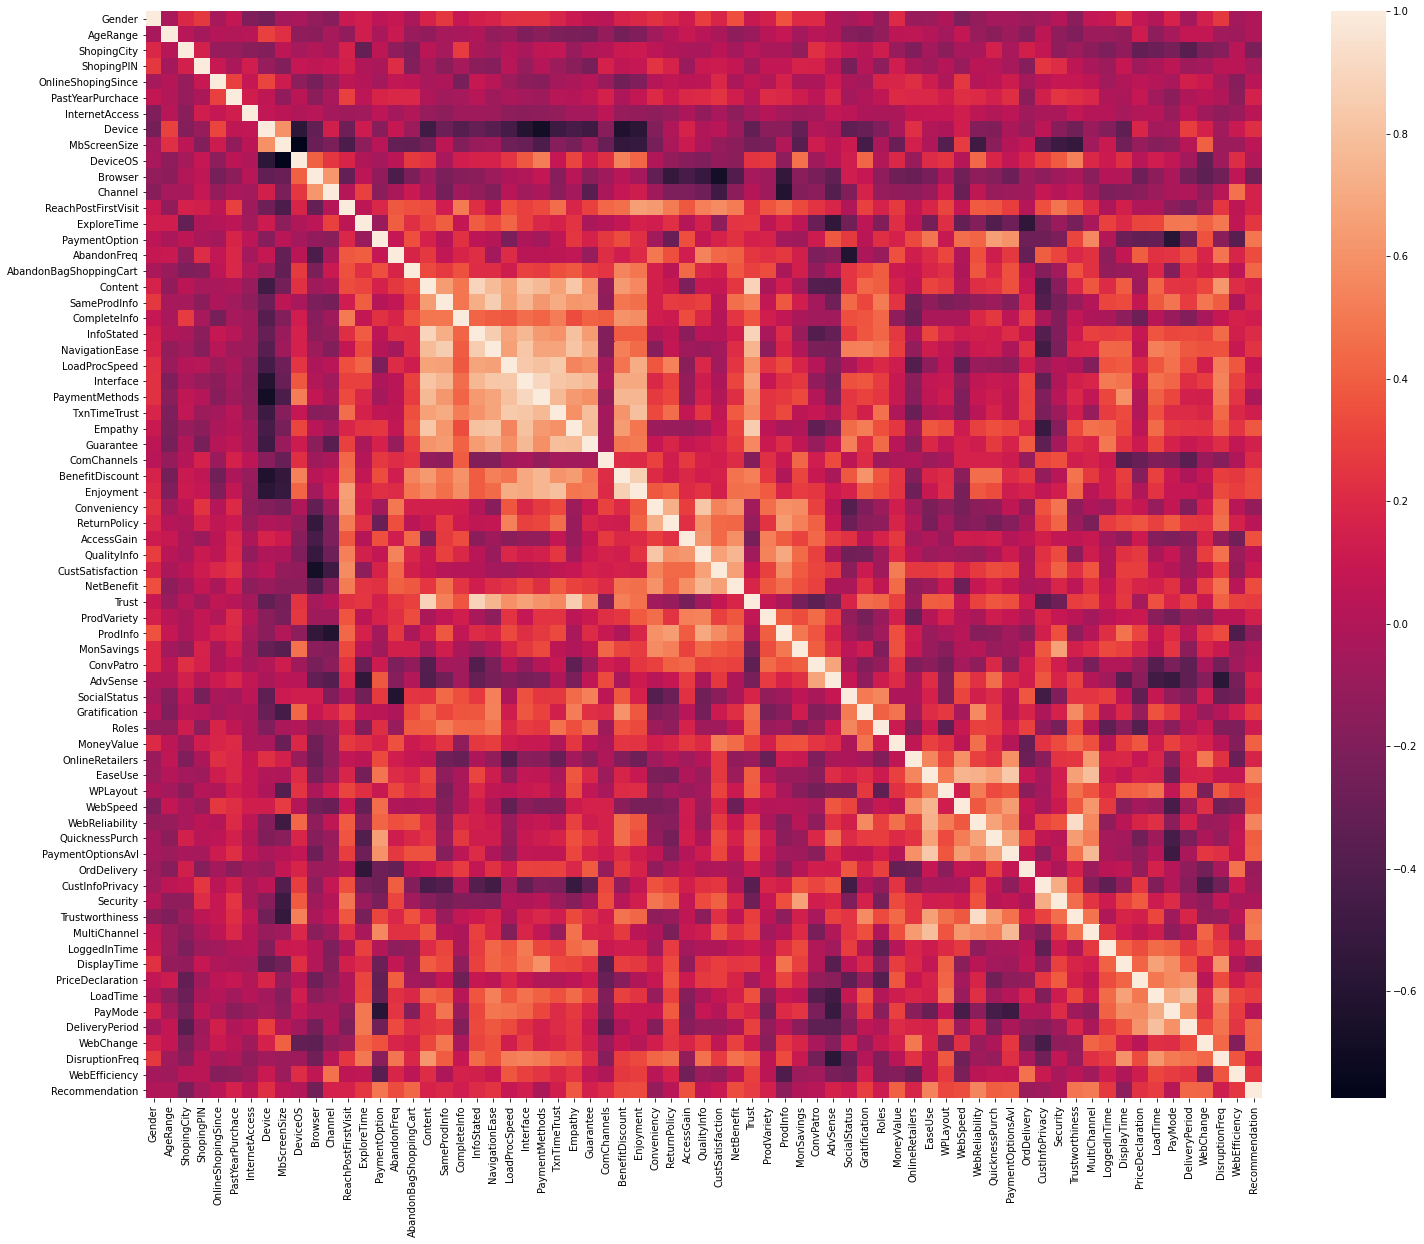

In [18]:
# checking correlation
dfcor=df.corr()
plt.subplots(figsize=(25,20))
sns.heatmap(dfcor)

These Columns are correlated to each : device,mbscreensize,deviseOS,channel,browser,content,sameProdInfo,completeInfo,navigationEase,InfoStated,loadProceedingSpeed,interface,paymethod,txn time trust,empathy,guarantee,benefit discount,enjoyment,conveniency,return policy,Quality info,cust satisfaction,net benefits,convinience of patronizing,adventure sense,social status,gratification,roles,OnlineRetailers,EaseUse,WPLayout,ProdVariety,ProdInfo,WebSpeed,WebReliability,QuicknessPurch,PaymentOptionsAvl,DisplayTime,PriceDeclaration,LoadTime,PayMode,DeliveryPeriod

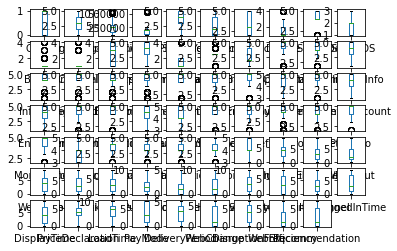

In [19]:
# Data Visualization - Unvariate plot (box and whisker plots)
df.plot(kind='box', subplots=True, layout=(7,10), sharex=False, sharey=False)
plt.show()

Outliers exist in these columns :ShopingCity,ShopingPIN,Device,MbScreenSize,Browser,Channel,InfoStated,NavigationEase,LoadProcSpeed,Interface,PaymentMethods,TxnTimeTrust,Empathy,ComChannels,ReturnPolicy,NetBenefit,Trust,ProdVariety


Data Analysis-As per the above detail analysis,it can be conclude that online shopping store are available in india w.r.t city & its highly impacted by below parameters:
device,mbscreensize,deviseOS,channel,browser,content,sameProdInfo,completeInfo,navigationEase,InfoStated,loadProceedingSpeed,interface,paymethod,txn time trust,empathy,guarantee,benefit discount,enjoyment,conveniency,return policy,Quality info,cust satisfaction,net benefits,convinience of patronizing,adventure sense,social status,gratification,roles,OnlineRetailers,EaseUse,WPLayout,ProdVariety,ProdInfo,WebSpeed,WebReliability,QuicknessPurch,PaymentOptionsAvl,DisplayTime,PriceDeclaration,LoadTime,PayMode,DeliveryPeriod.